### Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
- **What metric would you report for this dataset?**
- **What is its value?**



![Average Order Value](AOV.jpg)

#### Import Libraries

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [28]:
%matplotlib inline

Load Data

In [29]:
df = pd.read_excel(r"C:\Users\jarre\OneDrive\Desktop\Data_Science\GL_DataScience\CaseStudy_Problems\Shopify_Challenge22\2019 Winter Data Science Intern Challenge Data Set.xlsx")

In [30]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


- 5000 rows of data
- 1 time series
- 5 numerical columns 
- 1 categorical column
- no null values

In [32]:
df.isnull().any()

order_id          False
shop_id           False
user_id           False
order_amount      False
total_items       False
payment_method    False
created_at        False
dtype: bool

In [33]:
df.nunique()

order_id          5000
shop_id            100
user_id            301
order_amount       258
total_items          8
payment_method       3
created_at        4995
dtype: int64

#### Checks out there are 100 stores shown as 100 unique ids in shop id column
#### We see 3 different payment types

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,5000.0,2500.5000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
shop_id,5000.0,50.0788,29.006118,1.0,24.00,50.0,75.00,100.0
user_id,5000.0,849.0924,87.798982,607.0,775.00,849.0,925.00,999.0
order_amount,5000.0,3145.1280,41282.539349,90.0,163.00,284.0,390.00,704000.0
total_items,5000.0,8.7872,116.320320,1.0,1.00,2.0,3.00,2000.0


#### Observations
- We see the average total items is 8.78 where the median is at 2.  The range is 1 to 2000.  One very large order skewed the data.
- The standard deviation for order amount is abnormaly large.  The mean is far larger than the median value hence we have an outlier here

In [35]:
df.columns

Index(['order_id', 'shop_id', 'user_id', 'order_amount', 'total_items',
       'payment_method', 'created_at'],
      dtype='object')

#### Plot Distribution and Outliers

In [36]:


#plot hist

#plot box

In [37]:
df2 = df[['order_amount','total_items','shop_id']]
df2.head()

,order_amount,total_items,shop_id
0,224,2,53
1,90,1,92
2,144,1,44
3,156,1,18
4,156,1,18


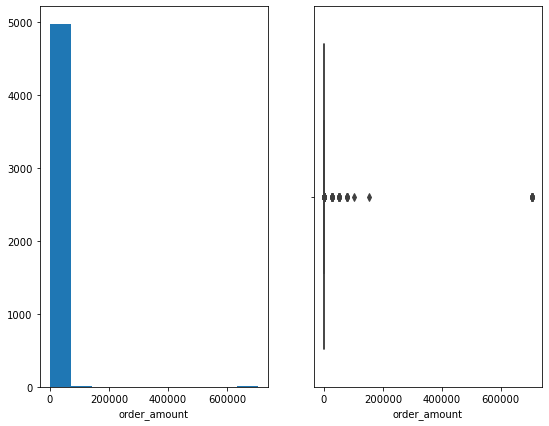

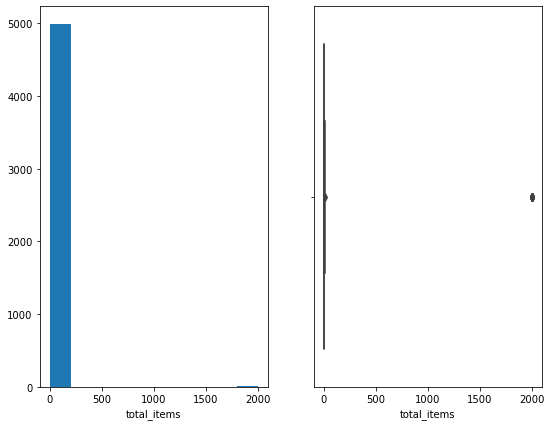

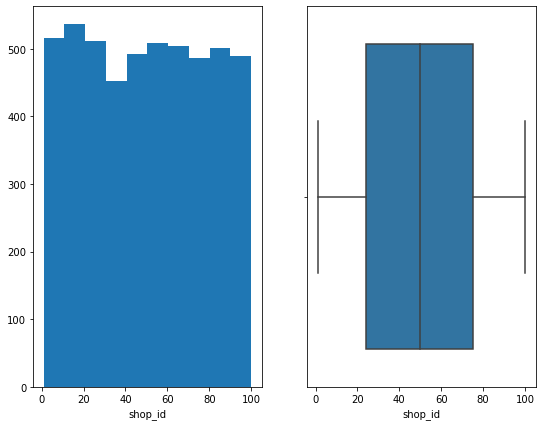

In [38]:
for col in df2.columns:
    fig,ax = plt.subplots(1,2,figsize=(9,7))
    df2[col].hist(ax=ax[0],grid=False)
    ax[0].set_xlabel(col)
    sns.boxplot(x=df2[col],ax=ax[1])

#### Observations
- We see there are about 6 outliers skewing the order amount but 1 extremely large amout over $600k which should be removed to gain a better true understanding of order amount
- We see one order exceeding 2000 items 
- Normal distribution shown detailing the number of transacactions per store, which makes it ok to remove outliers in data set

In [39]:
#how many orders exceed 75% of our data order amount > 390

df[df['order_amount']>1000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00.000
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:56.834
490,491,78,936,51450,2,debit,2017-03-26 17:08:18.911
493,494,78,983,51450,2,cash,2017-03-16 21:39:35.400
...,...,...,...,...,...,...,...
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00.000
4715,4716,78,818,77175,3,debit,2017-03-05 05:10:43.633
4868,4869,42,607,704000,2000,credit_card,2017-03-22 04:00:00.000
4882,4883,42,607,704000,2000,credit_card,2017-03-25 04:00:00.000


Import scipy norm module

In [40]:
from scipy.stats import norm

### Deal with outliers

In [41]:
dfskew = df['order_amount'].skew()
print(dfskew)

16.675033432503792


In [42]:
#determine skew
df.skew().sort_values(ascending=False)

total_items     17.065556
order_amount    16.675033
shop_id          0.013830
order_id         0.000000
user_id         -0.034052
dtype: float64

In [43]:
# Log transform a single column 
df['order_transform'] = np.log(df['order_amount'])
df.head() 

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_transform
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190,5.411646
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999,4.499810
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595,4.969813
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649,5.049856
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773,5.049856


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,5000.0,2500.500000,1443.520003,1.00000,1250.75000,2500.500000,3750.250000,5000.000000
shop_id,5000.0,50.078800,29.006118,1.00000,24.00000,50.000000,75.000000,100.000000
user_id,5000.0,849.092400,87.798982,607.00000,775.00000,849.000000,925.000000,999.000000
order_amount,5000.0,3145.128000,41282.539349,90.00000,163.00000,284.000000,390.000000,704000.000000
total_items,5000.0,8.787200,116.320320,1.00000,1.00000,2.000000,3.000000,2000.000000
order_transform,5000.0,5.652561,0.844728,4.49981,5.09375,5.648974,5.966147,13.464534


Plot log scaled values

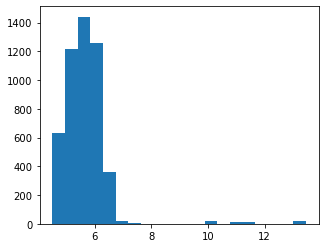

In [45]:
fig1, ax1 = plt.subplots(1,1,figsize=(5,4))
ax1.hist(df['order_transform'],bins=20)
plt.show()

Determine intervals where 95% of our data values lay

In [46]:
mu1 = df['order_transform'].mean()
sigma1 = df['order_transform'].std()
norm.interval(alpha=.95,loc=mu1,scale=sigma1)

(3.9969255394820506, 7.3081964981785195)

Check for how many rows are data are extreme values below 2.5%

In [47]:
df[df['order_transform']<3.997]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_transform


Check for how many rows are data are extreme values are above 97.5%

In [48]:
df[df['order_transform']>7.308]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_transform
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000,13.464534
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00.000,13.464534
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:56.834,10.155219
490,491,78,936,51450,2,debit,2017-03-26 17:08:18.911,10.848366
493,494,78,983,51450,2,cash,2017-03-16 21:39:35.400,10.848366
...,...,...,...,...,...,...,...,...
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00.000,13.464534
4715,4716,78,818,77175,3,debit,2017-03-05 05:10:43.633,11.253831
4868,4869,42,607,704000,2000,credit_card,2017-03-22 04:00:00.000,13.464534
4882,4883,42,607,704000,2000,credit_card,2017-03-25 04:00:00.000,13.464534


Remove outlier data which skew results

In [49]:
df_nonskew = df.loc[(df['order_transform']<7.308) & (df['order_transform']>3.997),:]
df_nonskew.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_transform
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190,5.411646
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999,4.499810
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595,4.969813
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649,5.049856
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773,5.049856


Plot new distribution

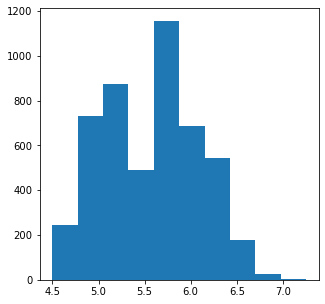

In [50]:
fig2, ax2 = plt.subplots(1,1,figsize=(5,5))
ax2.hist(df_nonskew['order_transform'],bins=10)
plt.show()

Looks like a normal distribution

In [51]:
df_nonskew.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,4936.0,2499.781199,1444.125385,1.00000,1247.75000,2497.500000,3751.250000,5000.000000
shop_id,4936.0,49.848055,29.063861,1.00000,24.00000,50.000000,74.000000,100.000000
user_id,4936.0,849.762966,86.845863,700.00000,775.00000,850.000000,925.000000,999.000000
order_amount,4936.0,302.285251,159.477154,90.00000,163.00000,284.000000,387.000000,1408.000000
total_items,4936.0,1.994125,0.981989,1.00000,1.00000,2.000000,3.000000,8.000000
order_transform,4936.0,5.578432,0.518239,4.49981,5.09375,5.648974,5.958425,7.249926


What is our Average Order Value now?

In [52]:
df_nonskew['order_amount'].mean()

302.2852512155592